Hard margin SVM with GridSearchCV(svm.SVC(), cv=5,param_grid={}) has best accuracy,it has highest R-Square value and lowest Mean squared error value. The performance measure actually tell me that I didn't get good result. I use a grid search to try out best parameter values.  Attribute 'Class' is the target of prediction. I transformed "classification_data.tsv" to "classification_data.csv". I use small size of data to increase speed. 

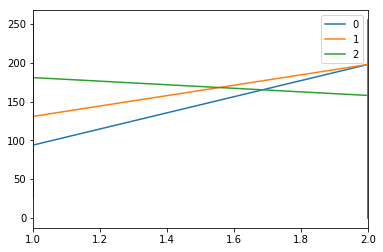

Coefficients: 
 [ 0.00339527 -0.00022885 -0.00450663]
data size: 245058


In [10]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.feature_selection import RFE, f_regression
from sklearn.linear_model import (LinearRegression)
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import (r2_score, mean_squared_error)

regression = pd.read_csv("./classification_data.csv")
regression.head()
#regression = regression.drop(['Red','Green','Blue'],axis=1)
Y = regression.Class.values
regression = regression.drop(['Class'], axis=1)
X = regression.as_matrix()
t = pd.DataFrame(X,index = Y )
t.plot()
plt.show()

regression_X_train = X[:]
regression_y_train = Y[:]
lr = LinearRegression(normalize=True)
lr.fit(regression_X_train, regression_y_train)
print('Coefficients: \n', lr.coef_)
print('data size: 245058')

In [7]:
#KernelRidge with kernel='linear'
from sklearn.kernel_ridge import KernelRidge
from sklearn.model_selection import GridSearchCV
#To reduce time, split the data set into a training set of 4000 (80%) and a testing set of 1000 (20%)
regression_X_train = X[:-241058]
regression_X_test =  X[(245058-244058):245058]

regression_y_train = Y[:-241058]
regression_y_test =  Y[(245058-244058):245058]
lr = GridSearchCV(KernelRidge(kernel='linear', gamma=1), cv=5,
                  param_grid={"alpha": [2,4,7],
                              "gamma": [0.1, 0.5, 1, 2, 4]})
#GridSearchCV is with 5-fold cross-validation and it includes grid search
lr.fit = lr.fit(regression_X_train, regression_y_train)
regression_y_train1 = lr.predict(regression_X_train)
dataPred = lr.predict(regression_X_test)
print("R^2 on test dataset by Linear KRR: ",r2_score(regression_y_test, dataPred)) 
print("Mean squared error: %.2f" % mean_squared_error(regression_y_test, dataPred))
#R^2 on test dataset by Linear KRR:  -37.4341607128
#Mean squared error: 6.25

R^2 on test dataset by Linear KRR:  -37.4341607128
Mean squared error: 6.25


In [35]:
#KernelRidge with kernel='poly'
#To reduce time, split the data set into a training set of 2000 (80%) and a testing set of 500 (20%)
regression_X_train = X[:-243058]
regression_X_test =  X[(245058-244558):245058]

regression_y_train = Y[:-243058]
regression_y_test =  Y[(245058-244558):245058]
lr = GridSearchCV(KernelRidge(kernel='poly', gamma=1), cv=5,
                  param_grid={"alpha": [2,4,7],
                              "gamma": [0.1, 0.5, 1, 2, 4]})
#GridSearchCV is with 5-fold cross-validation
lr.fit = lr.fit(regression_X_train, regression_y_train)
regression_y_train1 = lr.predict(regression_X_train)
dataPred = lr.predict(regression_X_test)
print("R^2 on test dataset by poly KRR: ",r2_score(regression_y_test, dataPred)) 
print("Mean squared error: %.2f" % mean_squared_error(regression_y_test, dataPred))
#R^2 on test dataset by poly KRR:  -381.557505029
#Mean squared error: 62.55

/Users/t0/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 8.878876873096602e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/t0/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 8.32732582170335e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/t0/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 9.037735687438652e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/t0/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected

R^2 on test dataset by poly KRR:  -381.557505029
Mean squared error: 62.55


In [34]:
#KernelRidge with kernel='rbf'
#To reduce time, split the data set into a training set of 4000 (80%) and a testing set of 1000 (20%)

regression_X_train = X[:-241058]
regression_X_test =  X[(245058-244058):245058]

regression_y_train = Y[:-241058]
regression_y_test =  Y[(245058-244058):245058]
lr = GridSearchCV(KernelRidge(kernel='rbf', gamma=1), cv=5,
                  param_grid={"alpha": [2,4,7],
                              "gamma": [0.1, 0.5, 1, 2, 4]})
#GridSearchCV is with 5-fold cross-validation
lr.fit = lr.fit(regression_X_train, regression_y_train)
regression_y_train1 = lr.predict(regression_X_train)
dataPred = lr.predict(regression_X_test)
print("R^2 on test dataset by rbf KRR: ",r2_score(regression_y_test, dataPred)) 
print("Mean squared error: %.2f" % mean_squared_error(regression_y_test, dataPred))
#R^2 on test dataset by rbf KRR:  -19.5871331947
#Mean squared error: 3.35

R^2 on test dataset by rbf KRR:  -19.5871331947
Mean squared error: 3.35


[1 1 1 ..., 2 2 2]
[[  1847      0]
 [ 49012 145186]]


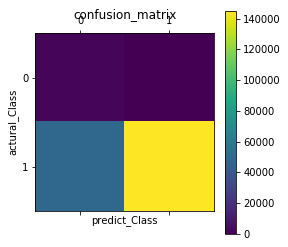

R^2 on test dataset by Logistic Regression:  -6.00754704759
Mean squared error: 0.07


In [36]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression   
#Split the data set into a training set of 80% and a testing set of 20%
regression_X_train = X[:-49012]
regression_X_test =  X[(245058-196046):245058]

regression_y_train = Y[:-49012]
regression_y_test =  Y[(245058-196046):245058]  
lr = GridSearchCV(LogisticRegression(), cv=5,param_grid={})   
lr.fit = lr.fit(regression_X_train, regression_y_train)
dataPred = lr.predict(regression_X_test)

from sklearn.metrics import confusion_matrix  
print (dataPred)
confusion_matrix=confusion_matrix(regression_y_test,regression_y_train)
print (confusion_matrix)
plt.matshow(confusion_matrix)
plt.title(u'confusion_matrix')
plt.colorbar()
plt.ylabel(u'actural_Class')
plt.xlabel(u'predict_Class')
plt.show()
from sklearn.cross_validation import cross_val_score
print("R^2 on test dataset by Logistic Regression: ",r2_score(regression_y_test, dataPred)) 
print("Mean squared error: %.2f" % mean_squared_error(regression_y_test, dataPred))
#R^2 on test dataset by Logistic Regression:  -6.00754704759
#Mean squared error: 0.07

[2 2 2 ..., 1 1 1]
[[    0     0]
 [10859  9141]]


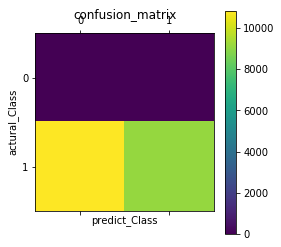

R^2 on test dataset by Hard margin SVM:  0.0
Mean squared error: 0.36


In [72]:
#Hard margin SVM
from sklearn import svm
#Split the data set
regression_X_train = X[40000:60000]
regression_X_test =  X[60000:80000]

regression_y_train = Y[40000:60000]
regression_y_test =  Y[60000:80000]  
#lr = GridSearchCV(svm.SVC(), cv=5,param_grid={'C': [1e-3, 1e-2, 1e-1, 1, 10, 100, 1000], 'gamma': [0.001, 0.0001]})
lr = GridSearchCV(svm.SVC(), cv=5,param_grid={})
#lr.fit(regression_X_train, regression_y_train)    
lr.fit = lr.fit(regression_X_train, regression_y_train)
dataPred = lr.predict(regression_X_test)
from sklearn.metrics import confusion_matrix  
print (dataPred)
confusion_matrix=confusion_matrix(regression_y_test,regression_y_train)
print (confusion_matrix)
plt.matshow(confusion_matrix)
plt.title(u'confusion_matrix')
plt.colorbar()
plt.ylabel(u'actural_Class')
plt.xlabel(u'predict_Class')
plt.show()
from sklearn.cross_validation import cross_val_score
print("R^2 on test dataset by Hard margin SVM: ",r2_score(regression_y_test, dataPred)) 
print("Mean squared error: %.2f" % mean_squared_error(regression_y_test, dataPred))
#R^2 on test dataset by Hard margin SVM:  0.0
#Mean squared error: 0.36

[2 2 2 ..., 1 1 1]
[[    0     0]
 [10859  9141]]


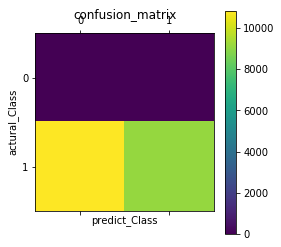

R^2 on test dataset by Soft margin SVM:  0.0
Mean squared error: 0.39


In [74]:
#Soft margin SVM
from sklearn import svm
#Split the data set
regression_X_train = X[40000:60000]
regression_X_test =  X[60000:80000]

regression_y_train = Y[40000:60000]
regression_y_test =  Y[60000:80000]  
lr = GridSearchCV(svm.SVC(), cv=5,param_grid={'C': [0.1, 0.5, 1, 2, 5]})
#lr = GridSearchCV(svm.SVC(), cv=5,param_grid={})
#lr.fit(regression_X_train, regression_y_train)    
lr.fit = lr.fit(regression_X_train, regression_y_train)
dataPred = lr.predict(regression_X_test)

from sklearn.metrics import confusion_matrix  
print (dataPred)
confusion_matrix=confusion_matrix(regression_y_test,regression_y_train)
print (confusion_matrix)
plt.matshow(confusion_matrix)
plt.title(u'confusion_matrix')
plt.colorbar()
plt.ylabel(u'actural_Class')
plt.xlabel(u'predict_Class')
plt.show()
from sklearn.cross_validation import cross_val_score
#scores=cross_val_score(regression_X_train,regression_y_train,cv=5)
#print ('accuracy',np.mean(scores),scores)
print("R^2 on test dataset by Soft margin SVM: ",r2_score(regression_y_test, dataPred)) 
print("Mean squared error: %.2f" % mean_squared_error(regression_y_test, dataPred))
#R^2 on test dataset by Soft margin SVM:  0.0
#Mean squared error: 0.39